In [1]:
!pip install xgboost
import pandas as pd
import numpy as np
import nltk
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
import re
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
from gensim.matutils import Sparse2Corpus
from gensim.models import LdaModel
from gensim.models import TfidfModel, LsiModel
from gensim.models.ldamodel import LdaModel
from gensim import matutils
from sklearn.cluster import KMeans
from gensim import corpora
from collections import defaultdict

In [2]:
df=pd.read_csv("SMSSpamCollection", sep='\t', names=['label','sms'])

In [3]:
df

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Exploratory Data Analysis
       1. Missing values
       2. Duplicate values
       3. Label Distribution
       4. Character Count
       5. Word Count
       6. Sentence Count
       7. Realation between features


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:

encoder= LabelEncoder()

In [7]:
df['label']= encoder.fit_transform(df['label'])

In [8]:
df

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
#missing values
df.isnull().sum()

label    0
sms      0
dtype: int64

In [10]:
#Duplicate values
print('Total number of duplicate values:',df.duplicated().sum())

Total number of duplicate values: 403


In [11]:
df=df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


([<matplotlib.patches.Wedge at 0x7fdfe806f700>,
 [Text(-0.4251944351600247, -1.0144997251399075, 'ham'),
  Text(0.46384837110076776, 1.1067270163085225, 'spam')],
 [Text(-0.23192423736001344, -0.5533634864399495, '87.4%'),
  Text(0.27057821647544783, 0.6455907595133047, '12.6%')])

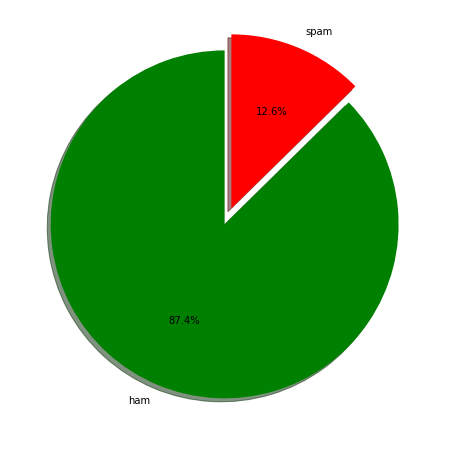

In [16]:
#plot graph for SMS distribution
plt.figure(figsize=(8, 8))
display(plt.pie(df['label'].value_counts(),explode=(0,0.1), labels=['ham','spam'],autopct='%1.1f%%',colors=['g','r'], shadow=True, startangle=90))



In [17]:
#num of character count
df['num_characters']= df['sms'].apply(len)

/var/folders/_9/67tsnk2j68s1wqps52ml3c880000gn/T/ipykernel_3393/1335492095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']= df['sms'].apply(len)


In [18]:
df.head()

,label,sms,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
#num of words count

In [20]:
df['num_words']=df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

/var/folders/_9/67tsnk2j68s1wqps52ml3c880000gn/T/ipykernel_3393/3603440869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))


In [21]:
df

,label,sms,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35
5568,0,Will ü b going to esplanade fr home?,36,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [22]:
#Num of sentence count
df['num_sentences']=df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

/var/folders/_9/67tsnk2j68s1wqps52ml3c880000gn/T/ipykernel_3393/2024037995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [23]:
df

,label,sms,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [24]:
# analyze new features
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593151,1.969627
std,58.437457,13.400486,1.443078
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# analyze ham message distribution
df[df['label']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267272,1.822852
std,56.715046,13.585433,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# analyze spam message distribution
df[df['label']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.984686
std,29.821348,6.993008,1.495313
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

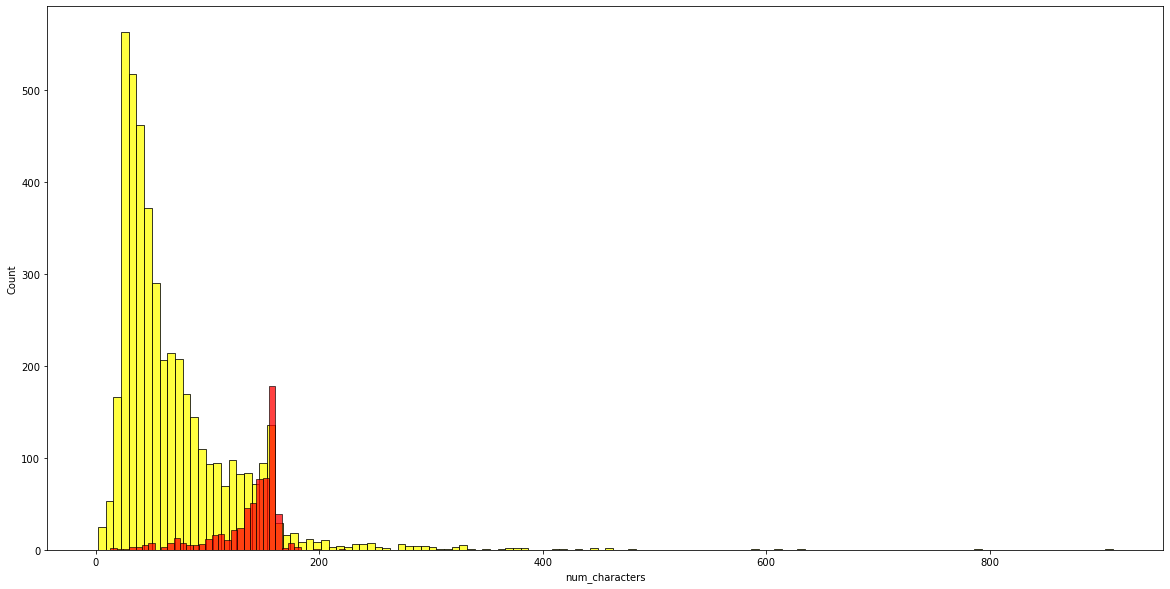

In [27]:
#Character count comparison in ham and spam
plt.figure(figsize=(20,10))
sns.histplot(df[df['label']==0]['num_characters'],color='yellow')
sns.histplot(df[df['label']==1]['num_characters'], color='red')

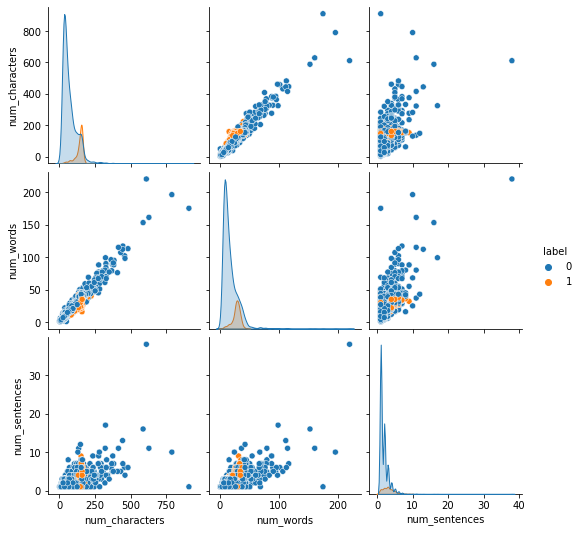

In [28]:
# analysis of new feature 
sns.pairplot(df,hue='label')

<AxesSubplot:>

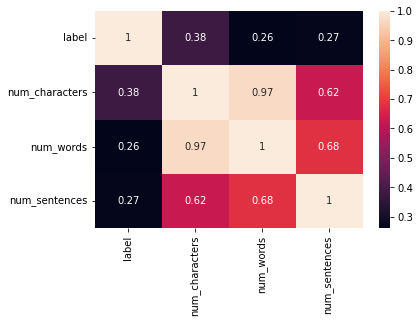

In [29]:
#finding correlation between new feature
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing
     1. Convert into lower case
     2. Stop word removal
     3. Special Charater removal
     4. Number removal
     5. Puntuation removal
     6. Stemming

In [30]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import re
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

In [33]:
 def data_preprocessing(sms):
    sms=sms.lower()                  #lowercase
    sms=nltk.word_tokenize(sms)  #tokenization
    
    
   # remove splecial characters 
    x=[]
    for i in sms:
        if i.isalnum():
            x.append(i) 
            
    #remove number
    
    sms=x[:]
    x.clear()
    
    num = "1234567890"
    for i in sms:
        if i not in num:
            x.append(i) 
    
    #remove stopwords
            
    sms=x[:]
    x.clear()
    
    for i in sms:
        if i not in stopwords.words('english'):
            x.append(i)
    
    #remove punctuation
    sms=x[:]
    x.clear()
    
    for i in sms:
        if i not in string.punctuation:
            x.append(i)  
          

    #Stemming
    
    sms= x[:]
    x.clear()
    
    for i in sms:
        x.append(ps.stem(i))
    
    return " ".join(x)





In [34]:
#apply preprocessing
df['preprocessed_text']=df['sms'].apply(lambda x: data_preprocessing(x))

/var/folders/_9/67tsnk2j68s1wqps52ml3c880000gn/T/ipykernel_3393/3226779072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_text']=df['sms'].apply(lambda x: data_preprocessing(x))


In [35]:
df

,label,sms,num_characters,num_words,num_sentences,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt 21st...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri contact u pound prize claim easi ...
5568,0,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [36]:
from wordcloud import WordCloud
word_cloud = WordCloud(width=500,height=500,min_font_size=12,background_color='white')

In [37]:
#Word cloud for spam 
spam_word_cloud = word_cloud .generate(df[df['label'] == 1]['preprocessed_text'].str.cat(sep=" "))

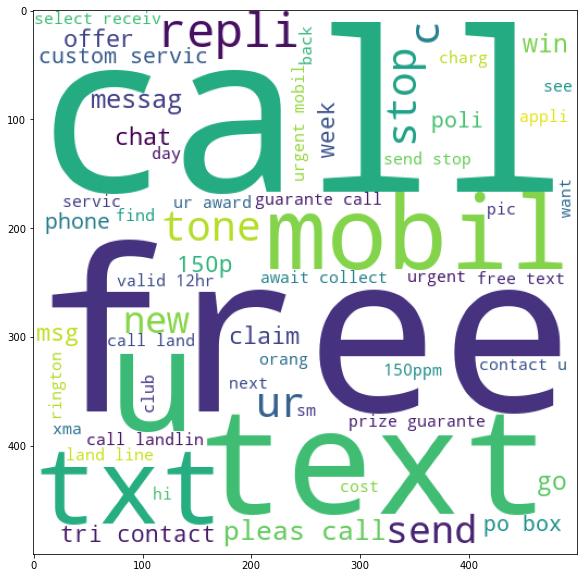

In [38]:
plt.figure(figsize=(15,10))
plt.imshow(spam_word_cloud)

In [39]:
#word cloud for ham 
ham_word_cloud = word_cloud .generate(df[df['label'] == 0]['preprocessed_text'].str.cat(sep=" "))

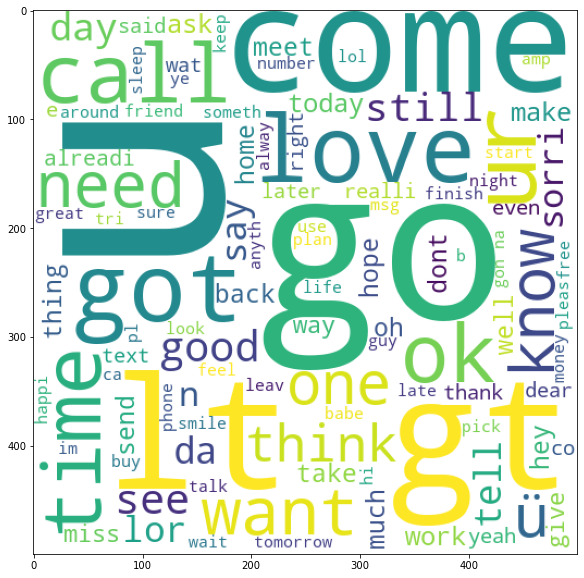

In [40]:
plt.figure(figsize=(15,10))
plt.imshow(ham_word_cloud)

In [41]:
df

,label,sms,num_characters,num_words,num_sentences,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt 21st...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri contact u pound prize claim easi ...
5568,0,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [42]:
#checking  30 common used words in spam
spam_df = []
for msg in df[df['label'] == 1]['preprocessed_text'].tolist():
    for word in msg.split():
        spam_df.append(word) 

In [43]:
len(spam_df)

9658

/Users/vrushabh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


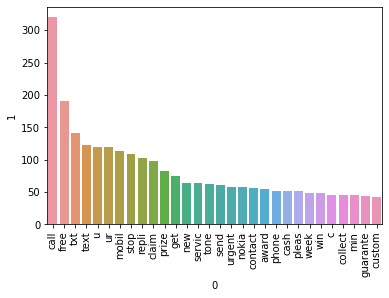

In [44]:

from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_df).most_common(30))[0],pd.DataFrame(Counter(spam_df).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
#checking  30 common used words in spam
ham_df = []
for msg in df[df['label'] == 0]['preprocessed_text'].tolist():
    for word in msg.split():
        ham_df.append(word)

In [46]:
len(ham_df)

35312

/Users/vrushabh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


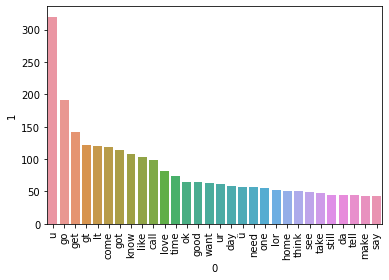

In [47]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_df).most_common(30))[0],pd.DataFrame(Counter(spam_df).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
df

,label,sms,num_characters,num_words,num_sentences,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt 21st...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri contact u pound prize claim easi ...
5568,0,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


# Build Model

## The model need to run 3 time, each time with different settings 
1. In first attempt use  count vectorizer to transform the data and run the model until and comment out after first attempt
2. In second attempt use  TFIDF vectorizer to transform the data and comment out after second attempt
3. In third attempt use  MinMaxScaler to transform the data 

In [105]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
# comment out after first attempt is complete
X = cv.fit_transform(df['preprocessed_text']).toarray()

In [150]:
# uncomment in second attempt
#comment out after second attempt is complete
#X = tfidf.fit_transform(df['preprocessed_text']).toarray()

In [87]:
# uncomment in third attempt

#X = tfidf.fit_transform(df['preprocessed_text']).toarray()

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [151]:
X.shape

(5169, 3000)

In [152]:
y = df['label'].values

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import plot_confusion_matrix

Accuracy with Test set: 0.8636363636363636
Precision score: 0.4669603524229075
Recall score: 0.8412698412698413
F1 score: 0.6005665722379604
Confusion Matrix:


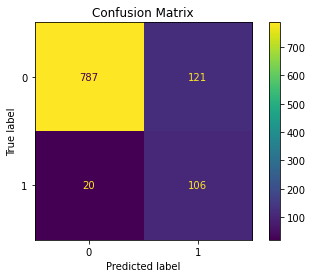

In [92]:
#Creation of Decision Tree Classifier

gnb = GaussianNB()

# Train gnb Classifer
gnb = gnb.fit(X_train,y_train)


#Predict the response for Test dataset
y_pred_test = gnb.predict(X_test)

# Model Accuracy  for Test set
print("Accuracy with Test set:",metrics.accuracy_score(y_test, y_pred_test))

print("Precision score:",precision_score(y_test, y_pred_test))
print("Recall score:",recall_score(y_test, y_pred_test))
print("F1 score:",f1_score(y_test, y_pred_test))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

cmd_obj.ax_.set(title='Confusion Matrix')
plt.show()

Accuracy with Test set: 0.9777562862669246
Precision score: 0.9724770642201835
Recall score: 0.8412698412698413
F1 score: 0.9021276595744682
Confusion Matrix:


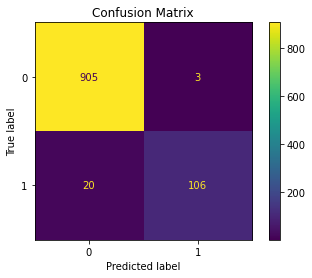

In [93]:
#Creation of Decision Tree Classifier

mnb = MultinomialNB()

# Train gnb Classifer
mnb = mnb.fit(X_train,y_train)


#Predict the response for Test dataset
y_pred_test = mnb.predict(X_test)

# Model Accuracy  for Test set
print("Accuracy with Test set:",metrics.accuracy_score(y_test, y_pred_test))

print("Precision score:",precision_score(y_test, y_pred_test))
print("Recall score:",recall_score(y_test, y_pred_test))
print("F1 score:",f1_score(y_test, y_pred_test))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

cmd_obj.ax_.set(title='Confusion Matrix')
plt.show()

Accuracy with Test set: 0.9758220502901354
Precision score: 0.9809523809523809
Recall score: 0.8174603174603174
F1 score: 0.8917748917748919
Confusion Matrix:


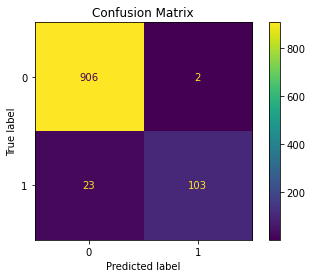

In [94]:
#Creation of Decision Tree Classifier

bnb = BernoulliNB()

# Train gnb Classifer
bnb = bnb.fit(X_train,y_train)


#Predict the response for Test dataset
y_pred_test = bnb.predict(X_test)

# Model Accuracy  for Test set
print("Accuracy with Test set:",metrics.accuracy_score(y_test, y_pred_test))

print("Precision score:",precision_score(y_test, y_pred_test))
print("Recall score:",recall_score(y_test, y_pred_test))
print("F1 score:",f1_score(y_test, y_pred_test))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

cmd_obj.ax_.set(title='Confusion Matrix')
plt.show()

In [ ]:

!pip install xgboost

# Models
   1. Logistic Regression
   2. SVC
   3. MultinimialNB
   4. Decision Tree
   5. Random Forest
   6. AdaBoost Classifier
   7. Bagging Classifier
   8. Extra Tree Classifier
   9. Gradient Boosting Classifier
   10. XGB Classifier

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [95]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
#bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [96]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [97]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    
    return accuracy,precision

(0.9729206963249516, 0.9622641509433962)

In [99]:
#Check clfs performance

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
   

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9622641509433962
For  KN
Accuracy -  0.9177949709864603
Precision -  1.0
For  NB
Accuracy -  0.9758220502901354
Precision -  0.9809523809523809
For  DT
Accuracy -  0.9400386847195358
Precision -  0.8404255319148937
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9662921348314607
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9803921568627451
For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.9339622641509434
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.8793103448275862
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9716981132075472
For  GBDT
Accuracy -  0.9429400386847195
Precision -  0.9240506329113924
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9519230769230769


In [66]:
# only run when using count vecterizer
result = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [67]:
# only run when using count vecterizer
result

,Algorithm,Accuracy,Precision
1,KN,0.917795,1.000000
5,RF,0.969052,0.989583
8,ETC,0.970986,0.980000
10,xgb,0.967118,0.969388
4,LR,0.971954,0.961905
9,GBDT,0.942940,0.958904
2,NB,0.965184,0.950000
7,BgC,0.958414,0.927835
3,DT,0.922631,0.910714
6,AdaBoost,0.962282,0.906542


In [68]:
# only run when using count vecterizer
df_2 = pd.melt(result, id_vars = "Algorithm")

In [69]:
# only run when using count vecterizer
df_2

,Algorithm,variable,value
0,KN,Accuracy,0.917795
1,RF,Accuracy,0.969052
2,ETC,Accuracy,0.970986
3,xgb,Accuracy,0.967118
4,LR,Accuracy,0.971954
5,GBDT,Accuracy,0.942940
6,NB,Accuracy,0.965184
7,BgC,Accuracy,0.958414
8,DT,Accuracy,0.922631
9,AdaBoost,Accuracy,0.962282


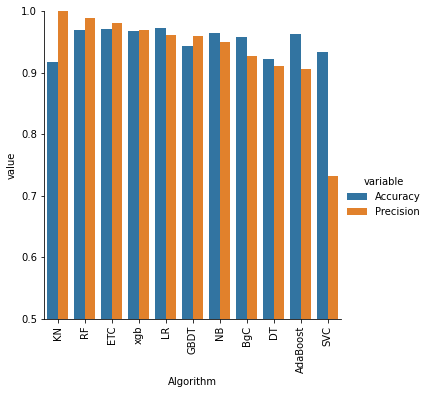

In [70]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=df_2, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [85]:
# only run when using Tf-idf vectorizer to concatenate the results for comparison
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

df_3 = result.merge(temp_df,on='Algorithm')
df_4=df_3.merge(temp_df,on='Algorithm')
df_4.drop(df_4.columns[[5,6]], axis=1, inplace=True)
df_4



,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x
0,KN,0.917795,1.000000,0.918762,1.000000
1,RF,0.969052,0.989583,0.972921,0.980392
2,ETC,0.970986,0.980000,0.974855,0.971698
3,xgb,0.967118,0.969388,0.969052,0.951923
4,LR,0.971954,0.961905,0.947776,0.918605
5,GBDT,0.942940,0.958904,0.942940,0.924051
6,NB,0.965184,0.950000,0.975822,0.980952
7,BgC,0.958414,0.927835,0.963250,0.879310
8,DT,0.922631,0.910714,0.940039,0.840426
9,AdaBoost,0.962282,0.906542,0.967118,0.933962


In [101]:
# only run when using MinMax Scaler to concatenate the results for comparison
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

df_3_scaled = df_3.merge(temp_df,on='Algorithm')
df_5=df_3_scaled.merge(temp_df,on='Algorithm')
df_5.drop(df_5.columns[[7,8]], axis=1, inplace=True)
df_5


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling_x,Precision_scaling_x
0,KN,0.917795,1.000000,0.918762,1.000000,0.917795,1.000000
1,RF,0.969052,0.989583,0.972921,0.980392,0.972921,0.980392
2,ETC,0.970986,0.980000,0.974855,0.971698,0.974855,0.971698
3,xgb,0.967118,0.969388,0.969052,0.951923,0.969052,0.951923
4,LR,0.971954,0.961905,0.947776,0.918605,0.958414,0.966292
5,GBDT,0.942940,0.958904,0.942940,0.924051,0.942940,0.924051
6,NB,0.965184,0.950000,0.975822,0.980952,0.975822,0.980952
7,BgC,0.958414,0.927835,0.963250,0.879310,0.963250,0.879310
8,DT,0.922631,0.910714,0.940039,0.840426,0.940039,0.840426
9,AdaBoost,0.962282,0.906542,0.967118,0.933962,0.967118,0.933962


# Voting and Stacking Classifer

In [ ]:
#can run this model with all 3 setting , but we are particularly focusing on TF-IDF vectorize which provided higest model performance.

In [155]:


svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [156]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [157]:

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

Accuracy 0.97678916827853
Precision 0.9903846153846154
Recall score: 0.8174603174603174
F1 score: 0.8956521739130435
Confusion Matrix:


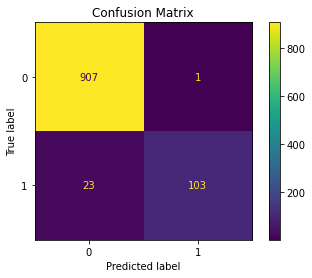

In [158]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall score:",recall_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

cmd_obj.ax_.set(title='Confusion Matrix')
plt.show()


In [159]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()


In [160]:
from sklearn.ensemble import StackingClassifier

In [161]:

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

Accuracy 0.9816247582205029
Precision 0.9734513274336283
Recall score: 0.873015873015873
F1 score: 0.9205020920502092
Confusion Matrix:


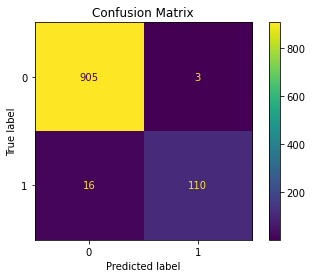

In [162]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall score:",recall_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

cmd_obj.ax_.set(title='Confusion Matrix')
plt.show()



# Oversampling

Solved data imbalance using SMOTE techniques

## Run the entire model.

In [119]:
X = tfidf.fit_transform(df['preprocessed_text']).toarray()

In [120]:
X.shape

(5169, 3000)

In [121]:
y = df['label'].values

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [123]:
#oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train,y_train)
print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)

X_train :  (7216, 3000)
X_test :  (1034, 3000)
y_train :  (7216,)
y_test :  (1034,)


Accuracy with Test set: 0.8684719535783365
Precision score: 0.47685185185185186
Recall score: 0.8174603174603174
F1 score: 0.6023391812865497
Confusion Matrix:


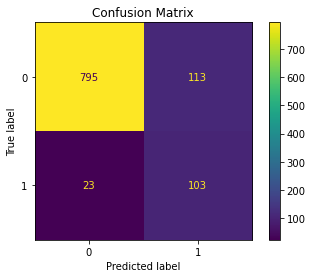

In [124]:
#Creation of Decision Tree Classifier

gnb = GaussianNB()

# Train gnb Classifer
gnb = gnb.fit(X_train,y_train)


#Predict the response for Test dataset
y_pred_test = gnb.predict(X_test)

# Model Accuracy  for Test set
print("Accuracy with Test set:",metrics.accuracy_score(y_test, y_pred_test))

print("Precision score:",precision_score(y_test, y_pred_test))
print("Recall score:",recall_score(y_test, y_pred_test))
print("F1 score:",f1_score(y_test, y_pred_test))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

cmd_obj.ax_.set(title='Confusion Matrix')
plt.show()

Accuracy with Test set: 0.9574468085106383
Precision score: 0.7847222222222222
Recall score: 0.8968253968253969
F1 score: 0.837037037037037
Confusion Matrix:


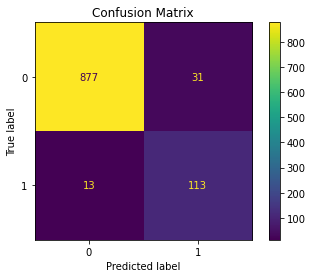

In [125]:
#Creation of Decision Tree Classifier

mnb = MultinomialNB()

# Train gnb Classifer
mnb = mnb.fit(X_train,y_train)


#Predict the response for Test dataset
y_pred_test = mnb.predict(X_test)

# Model Accuracy  for Test set
print("Accuracy with Test set:",metrics.accuracy_score(y_test, y_pred_test))

print("Precision score:",precision_score(y_test, y_pred_test))
print("Recall score:",recall_score(y_test, y_pred_test))
print("F1 score:",f1_score(y_test, y_pred_test))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

cmd_obj.ax_.set(title='Confusion Matrix')
plt.show()

Accuracy with Test set: 0.9835589941972921
Precision score: 0.990990990990991
Recall score: 0.873015873015873
F1 score: 0.9282700421940928
Confusion Matrix:


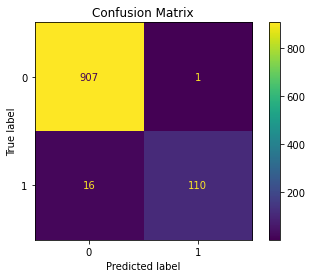

In [126]:
#Creation of Decision Tree Classifier

bnb = BernoulliNB()

# Train gnb Classifer
bnb = bnb.fit(X_train,y_train)


#Predict the response for Test dataset
y_pred_test = bnb.predict(X_test)

# Model Accuracy  for Test set
print("Accuracy with Test set:",metrics.accuracy_score(y_test, y_pred_test))

print("Precision score:",precision_score(y_test, y_pred_test))
print("Recall score:",recall_score(y_test, y_pred_test))
print("F1 score:",f1_score(y_test, y_pred_test))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

cmd_obj.ax_.set(title='Confusion Matrix')
plt.show()

In [127]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [128]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [129]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    
    return accuracy,precision

In [130]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9390715667311412
Precision -  0.6932515337423313
For  KN
Accuracy -  0.3355899419729207
Precision -  0.15498154981549817
For  NB
Accuracy -  0.9835589941972921
Precision -  0.990990990990991
For  DT
Accuracy -  0.9090909090909091
Precision -  0.6038961038961039
For  LR
Accuracy -  0.9497098646034816
Precision -  0.7569444444444444
For  RF
Accuracy -  0.97678916827853
Precision -  0.9322033898305084
For  AdaBoost
Accuracy -  0.9574468085106383
Precision -  0.8306451612903226
For  BgC
Accuracy -  0.9439071566731141
Precision -  0.7428571428571429
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.890625
For  GBDT
Accuracy -  0.9284332688588007
Precision -  0.6710526315789473
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.8770491803278688


In [133]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_oversample':accuracy_scores,'Precision_oversample':precision_scores}).sort_values('Precision_oversample',ascending=False)
df_3_oversample = df_3.merge(temp_df,on='Algorithm')
df_6=df_3_oversample.merge(temp_df,on='Algorithm')
df_6.drop(df_6.columns[[7,8]], axis=1, inplace=True)
df_6





,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_oversample_x,Precision_oversample_x
0,KN,0.917795,1.000000,0.918762,1.000000,0.335590,0.154982
1,RF,0.969052,0.989583,0.972921,0.980392,0.976789,0.932203
2,ETC,0.970986,0.980000,0.974855,0.971698,0.974855,0.890625
3,xgb,0.967118,0.969388,0.969052,0.951923,0.967118,0.877049
4,LR,0.971954,0.961905,0.947776,0.918605,0.949710,0.756944
5,GBDT,0.942940,0.958904,0.942940,0.924051,0.928433,0.671053
6,NB,0.965184,0.950000,0.975822,0.980952,0.983559,0.990991
7,BgC,0.958414,0.927835,0.963250,0.879310,0.943907,0.742857
8,DT,0.922631,0.910714,0.940039,0.840426,0.909091,0.603896
9,AdaBoost,0.962282,0.906542,0.967118,0.933962,0.957447,0.830645


In [189]:
df_6.to_csv('over.csv')

In [139]:
# Voting Classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bnb = BernoulliNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier



In [148]:
voting = VotingClassifier(estimators=[('rfc', rfc), ('nb', bnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', BernoulliNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

Accuracy 0.9854932301740812
Precision 0.9911504424778761
Recall score: 0.8888888888888888
F1 score: 0.9372384937238493
Confusion Matrix:


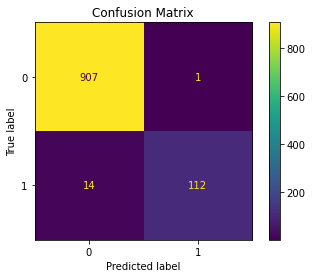

In [149]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall score:",recall_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

cmd_obj.ax_.set(title='Confusion Matrix')
plt.show()




In [144]:
# Applying stacking
estimators=[('rfc', rfc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [145]:
from sklearn.ensemble import StackingClassifier

In [146]:

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

Accuracy 0.9806576402321083
Precision 0.9818181818181818
Recall score: 0.8571428571428571
F1 score: 0.9152542372881356
Confusion Matrix:


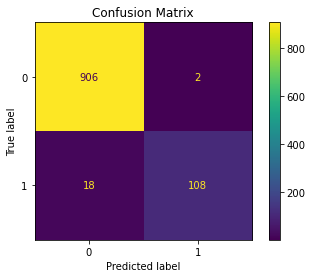

In [147]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall score:",recall_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

cmd_obj.ax_.set(title='Confusion Matrix')
plt.show()


# Topic Modelling

In [ ]:
from gensim.matutils import Sparse2Corpus
from gensim.models import LdaModel

In [ ]:
#df[preprocessed_text]

In [163]:
def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

In [164]:
df['preprocessed_text_lem'] = df['preprocessed_text'].apply(lambda x: lemmatizing(x))

/var/folders/_9/67tsnk2j68s1wqps52ml3c880000gn/T/ipykernel_3393/3077899190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_text_lem'] = df['preprocessed_text'].apply(lambda x: lemmatizing(x))


In [166]:
df

,label,sms,num_characters,num_words,num_sentences,preprocessed_text,preprocessed_text_lem
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt 21st...,free entri wkli comp win fa cup final tkt 21st...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri contact u pound prize claim easi ...,2nd time tri contact u pound prize claim easi ...
5568,0,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanad fr home,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...,guy bitch act like interest buy someth el next...


In [193]:
from gensim.models import TfidfModel, LsiModel
from gensim.models.ldamodel import LdaModel
from gensim import matutils
from sklearn.cluster import KMeans
from gensim import corpora


In [199]:
from collections import defaultdict
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [200]:
def tokenize(text):
    text_wordlist = []
    for x in re.split(r"([.,!?\s]+)", text):
        if x and x not in [".", " "] and x.lower() not in stop_words:
            text_wordlist.append(x)
    return(text_wordlist)

texts = list(df["preprocessed_text_lem"].apply( lambda text: tokenize(text)))



In [201]:
dictionary = corpora.Dictionary(texts)
# print(dictionary.id2token) ## to see the actual dictionary generated
corpus = [dictionary.doc2bow(text) for text in texts] ## document to bag of words

# LDA model
transcripts_topics = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, alpha='auto') 
print(transcripts_topics)
# print out first 5 topics
for i, topic in enumerate(transcripts_topics.print_topics(10)):
    print ('%d: %s\n'%(i+1, topic))

LdaModel<num_terms=6751, num_topics=10, decay=0.5, chunksize=2000>
1: (0, '0.019*"ü" + 0.019*"lt" + 0.019*"gt" + 0.015*"later" + 0.013*"got" + 0.013*"call" + 0.011*"go" + 0.010*"want" + 0.009*"way" + 0.009*"like"')

2: (1, '0.031*"u" + 0.014*"make" + 0.012*"call" + 0.010*"im" + 0.008*"know" + 0.008*"thing" + 0.008*"ur" + 0.008*"time" + 0.008*"right" + 0.007*"pl"')

3: (2, '0.017*"repli" + 0.013*"call" + 0.013*"stop" + 0.012*"text" + 0.012*"u" + 0.010*"got" + 0.009*"free" + 0.009*"go" + 0.008*"min" + 0.007*"time"')

4: (3, '0.047*"gt" + 0.045*"lt" + 0.015*"call" + 0.011*"min" + 0.011*"u" + 0.009*"time" + 0.009*"free" + 0.008*"number" + 0.007*"order" + 0.007*"open"')

5: (4, '0.035*"u" + 0.030*"get" + 0.022*"ur" + 0.019*"free" + 0.010*"txt" + 0.009*"na" + 0.008*"send" + 0.008*"call" + 0.008*"k" + 0.008*"tell"')

6: (5, '0.020*"call" + 0.014*"mobil" + 0.013*"come" + 0.012*"get" + 0.011*"think" + 0.010*"prize" + 0.009*"home" + 0.007*"like" + 0.007*"claim" + 0.007*"tri"')

7: (6, '0.060*"u"

In [202]:
# attaching document topics to distionnary
#get index  for topic 
document_key = list(df.index)  
document_topic = {}
for doc_id in range(len(corpus)):
    doc_cor = corpus[doc_id]
    doc_topics = transcripts_topics.get_document_topics(doc_cor, 0)
    tmp = []
    for topic_id, topic_prob in doc_topics:
        tmp.append(topic_prob)
    document_topic[document_key[doc_id]] = tmp
# convert dictionnary to dataframe
df_t = pd.DataFrame.from_dict(document_topic, orient='index')
topic_column_names = ['topic_' + str(i) for i in range(0, 10)]
df_t.columns = topic_column_names
df_t['preprocessed_text_lem'] = (df['preprocessed_text_lem'])

def find_topic(row): 
    if (row.loc[row>0.3]).any():
        return row.loc[row>0.3].index[0]
    else:
        return None
    
def find_propensity(row)
    if (row.loc[row>0.3]).any():
        return row.loc[row>0.3].values[0]
    else:
        return None
    
df_t['topic'] = df_t.loc[:, df_t.columns !='preprocessed_text_lem'].apply(find_topic, axis = 1)
df_t['propensity'] = df_t.iloc[:, 0:9].apply(find_propensity, axis = 1)
df_t.drop(columns=df_t.columns[:10], inplace=True)
display(df_t.head)

<bound method NDFrame.head of                                   preprocessed_text_lem    topic  propensity
0     go jurong point crazi avail bugi n great world...  topic_6    0.955854
1                                 ok lar joke wif u oni  topic_1    0.889394
2     free entri wkli comp win fa cup final tkt 21st...  topic_2    0.510753
3                   u dun say earli hor u c alreadi say  topic_0    0.443649
4                  nah think goe usf live around though  topic_7    0.653813
...                                                 ...      ...         ...
5567  2nd time tri contact u pound prize claim easi ...  topic_2    0.952005
5568                            ü b go esplanad fr home  topic_0    0.536153
5569                                  piti mood suggest  topic_9         NaN
5570  guy bitch act like interest buy someth el next...  topic_0    0.739648
5571                                     rofl true name  topic_3    0.801176

[5169 rows x 3 columns]>

In [210]:
df_t.head(15)

,preprocessed_text_lem,topic,propensity
0,go jurong point crazi avail bugi n great world...,topic_6,0.955854
1,ok lar joke wif u oni,topic_1,0.889394
2,free entri wkli comp win fa cup final tkt 21st...,topic_2,0.510753
3,u dun say earli hor u c alreadi say,topic_0,0.443649
4,nah think goe usf live around though,topic_7,0.653813
5,freemsg hey darl week word back like fun still...,topic_5,0.471644
6,even brother like speak treat like aid patent,topic_3,0.323827
7,per request mell oru minnaminungint nurungu ve...,topic_5,0.948904
8,winner valu network custom select receivea pri...,topic_4,0.343404
9,mobil 11 month u r entitl updat latest colour ...,topic_5,0.793929


In [211]:
df_t.to_csv('Topic.csv')

In [204]:
df_t['topic'].value_counts()

topic_6    831
topic_0    768
topic_4    641
topic_1    518
topic_7    511
topic_2    458
topic_8    356
topic_9    355
topic_5    349
topic_3    323
Name: topic, dtype: int64